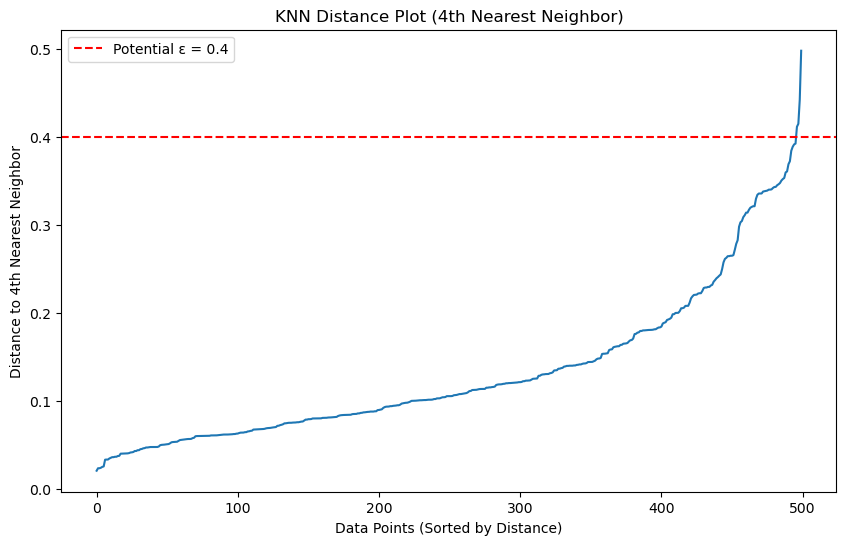

    Epsilon (ε)  MinPoints  Clusters Formed  Noise Points  Silhouette Score  \
0           0.1          3               34           162          0.307145   
1           0.1          4               24           209          0.307777   
2           0.1          5               13           263          0.400284   
3           0.2          3               17            41          0.281464   
4           0.2          4               14            61          0.299591   
5           0.2          5               15            68          0.278628   
6           0.3          3               17            14          0.266990   
7           0.3          4               16            20          0.273533   
8           0.3          5               14            30          0.280065   
9           0.4          3                1             1               NaN   
10          0.4          4                1             1               NaN   
11          0.4          5                1         

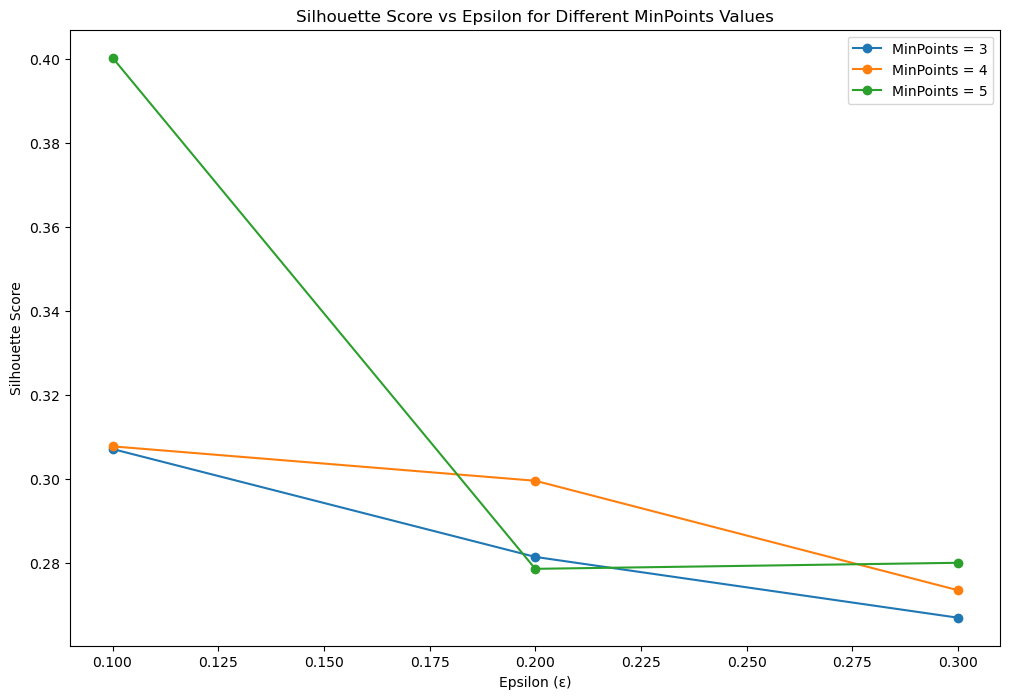

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numeric
categorical_columns = ['Job Satisfaction', 'Work-Life Balance']
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Select relevant features
selected_features = data[['Job Satisfaction', 'Monthly Income', 'Years at Company', 'Work-Life Balance']]

# ------------------------------
# 1. Normalize the features using MinMaxScaler
# ------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(selected_features)

# ------------------------------
# 2. Plot KNN distances to identify the elbow point
# ------------------------------
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot the KNN distances
distances = np.sort(distances[:, 3])  # 3rd index for the 4th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('KNN Distance Plot (4th Nearest Neighbor)')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.axhline(y=0.4, color='r', linestyle='--', label='Potential ε = 0.4')
plt.legend()
plt.show()

# ------------------------------
# 3. Apply DBSCAN Clustering for Refined ε and MinPoints values
# ------------------------------
eps_values = np.arange(0.1, 1.0, 0.1)
min_points_values = [3, 4, 5]
results = []

# Iterate over ε and MinPoints values
for eps in eps_values:
    for min_points in min_points_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_points)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Count clusters and noise points
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)

        # Calculate Silhouette and Davies-Bouldin if clusters > 1
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
            davies_bouldin = davies_bouldin_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
        else:
            silhouette_avg = None
            davies_bouldin = None

        # Append results
        results.append({
            'Epsilon (ε)': eps,
            'MinPoints': min_points,
            'Clusters Formed': n_clusters,
            'Noise Points': n_noise,
            'Silhouette Score': silhouette_avg,
            'Davies-Bouldin Index': davies_bouldin
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# ------------------------------
# 4. Display and Save Results
# ------------------------------
# Print the results DataFrame
print(results_df)

# Save the results to a CSV file for easier review
results_df.to_csv('dbscan_results.csv', index=False)

# ------------------------------
# 5. Plot Silhouette Scores
# ------------------------------
plt.figure(figsize=(12, 8))
for min_points in min_points_values:
    subset = results_df[results_df['MinPoints'] == min_points]
    plt.plot(subset['Epsilon (ε)'], subset['Silhouette Score'], marker='o', label=f'MinPoints = {min_points}')

plt.title('Silhouette Score vs Epsilon for Different MinPoints Values')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


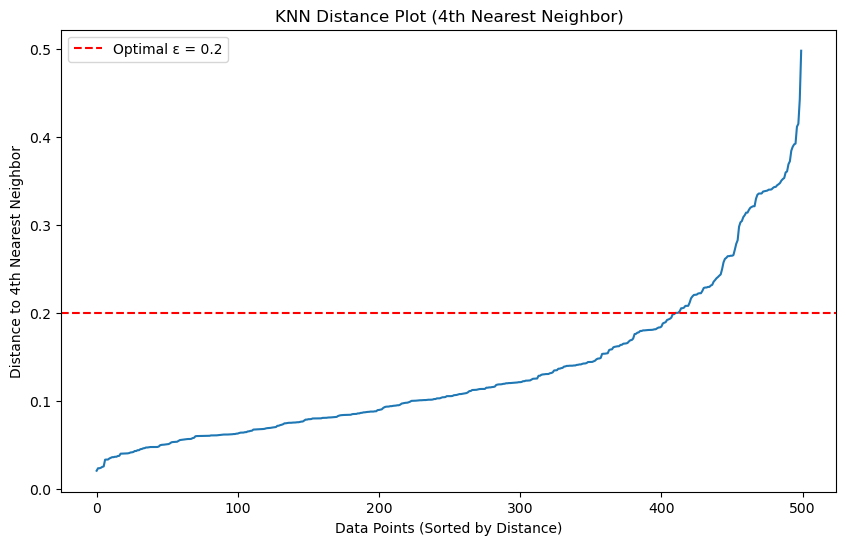

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numeric
categorical_columns = ['Job Satisfaction', 'Work-Life Balance']
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Select relevant features
selected_features = data[['Job Satisfaction', 'Monthly Income', 'Years at Company', 'Work-Life Balance']]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(selected_features)

# Plot KNN distances to identify the elbow point for eps = 0.2 and MinPoints = 4
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot the KNN distances for eps = 0.2
sorted_distances = np.sort(distances[:, 3])  # 3rd index for the 4th neighbor
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('KNN Distance Plot (4th Nearest Neighbor)')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.axhline(y=0.2, color='r', linestyle='--', label='Optimal ε = 0.2')
plt.legend()
plt.show()


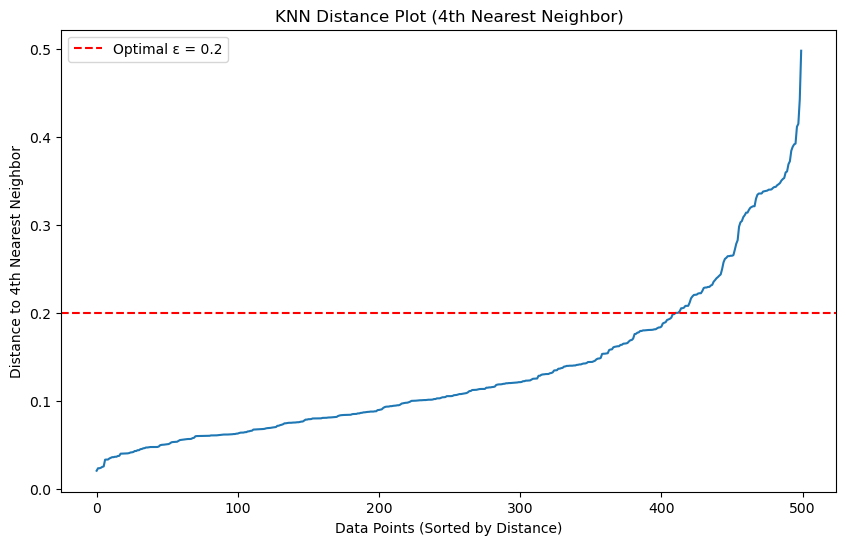

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numeric
categorical_columns = ['Job Satisfaction', 'Work-Life Balance']
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Select relevant features
selected_features = data[['Job Satisfaction', 'Monthly Income', 'Years at Company', 'Work-Life Balance']]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(selected_features)

# Plot KNN distances to identify the elbow point for eps = 0.2 and MinPoints = 4
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot the KNN distances for eps = 0.2
sorted_distances = np.sort(distances[:, 3])  # 3rd index for the 4th neighbor
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('KNN Distance Plot (4th Nearest Neighbor)')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.axhline(y=0.2, color='r', linestyle='--', label='Optimal ε = 0.2')
plt.legend()

# Save the figure in the current directory
plt.savefig('KNN_Distance_Plot_Epsilon_0.2.png')
plt.show()
